In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# OPTIONAL (more relevant for individual words)
from nltk.stem import LancasterStemmer, WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
import unicodedata
import nltk
import json
import inflect
import matplotlib.pyplot as plt

Saving your_posts_1.json to your_posts_1.json


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import json
# load json into python, assign to 'data'
with open('your_posts_1.json') as file:
    data = json.load(file)
print(type(data))     # a list
print(type(data[0]))  # first object in the list: a dictionary
print(len(data))

<class 'list'>
<class 'dict'>
5038


In [ ]:
# create empty list
empty_lst = []
# multiple nested loops to store all post in empty list
for dct in data:
    for k, v in dct.items():
        if k == 'data':
            if len(v) > 0:
                for k_i, v_i in v[0].items():  
                    if k_i == 'post':
                        empty_lst.append(v_i)
print("This is the empty list: ", empty_lst)
print("\nLength of list: ", len(empty_lst))
for i in empty_lst:
  print(i)

This is the empty list:  ['Krish Naik created a Video for með\x9f\x98\x8dð\x9f\x98\x8d Must watch!', 'Amazing Work by @[100010286773956:2048:Hritika Aggarwal]ð\x9f\x8cº', 'In this article, Iâ\x80\x99ll walk you through how to create a fashion recommendation system with Machine Learning that will work like highly personalized online shopping recommendations.', 'Machine Learning Full Course with Python - for free', 'Practice your skills in Data Science Projects with Python, by learning and then trying all these hands-on, interactive projects, that I have posted for you.', 'In this article, I will take you through a solution to fraud detection with machine learning.', 'Happy bday dið\x9f\x8c¹â\xad\x90â\xad\x90', 'In this article, I will take you through the 17 most used machine learning algorithms using Python.', 'In this article, I will take you through the 17 most used machine learning algorithms using Python.', 'In this article, I will take you through the 17 most used machine learning

In [ ]:
nltk.download('punkt')
nested_sent_token = [nltk.sent_tokenize(lst) for lst in empty_lst]
# flatten list, len: 3241
flat_sent_token = [item for sublist in nested_sent_token for item in sublist]
print("Flatten sentence token: ", len(flat_sent_token))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Flatten sentence token:  3923


In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII character from List of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode(
            'ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
# To LowerCase
def to_lowercase(words):
    """Convert all characters to lowercase from List of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
# Remove Punctuation , then Re-Plot Frequency Graph
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
# Replace Numbers with Textual Representations
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
# Remove Stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words
# Combine all functions into Normalize() function
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

In [ ]:
nltk.download('stopwords')
sents = normalize(flat_sent_token)
print("Length of sentences list: ", len(sents))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Length of sentences list:  3866


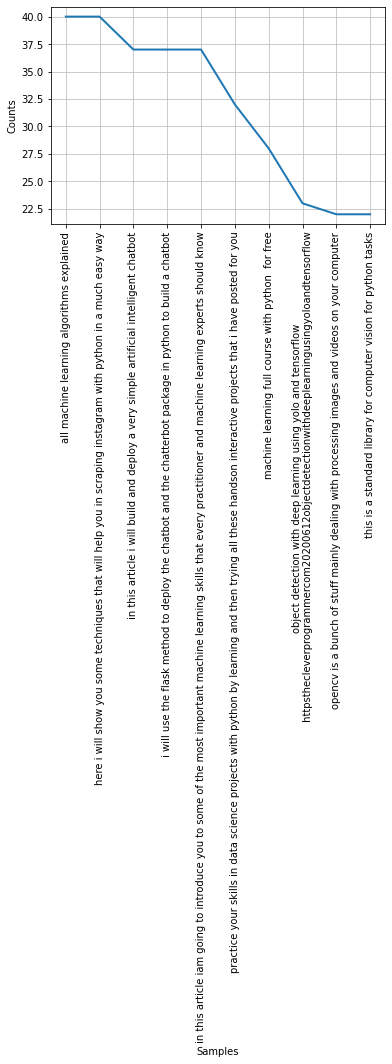

In [ ]:
from nltk.probability import FreqDist
# Find frequency of sentence
fdist_sent = FreqDist(sents)
fdist_sent.most_common(10)   
# Plot
fdist_sent.plot(10)

In [ ]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sentiment = []
sentiment2 = []
for sent in sents:
    sent1 = sent
    sent_scores = sid.polarity_scores(sent1)
    for x, y in sent_scores.items():
        sentiment2.append((x, y))
    sentiment.append((sent1, sent_scores))
    # print(sentiment)
# sentiment
cols = ['sentence', 'numbers']
result = pd.DataFrame(sentiment, columns=cols)
print("First five rows of results: ", result.head())
# sentiment2
cols2 = ['label', 'values']
result2 = pd.DataFrame(sentiment2, columns=cols2)
print("First five rows of results2: ", result2.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
First five rows of results:                                              sentence                                            numbers
0       krish naik created a video for me must watch  {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...
1  amazing work by 1000102867739562048hritika agg...  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...
2  in this article iall walk you through how to c...  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...
3  machine learning full course with python  for ...  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...
4  practice your skills in data science projects ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
First five rows of results2:        label  values
0       neg   0.000
1       neu   0.778
2       pos   0.222
3  compound   0.250
4       neg   0.000
